Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')
Accuracy: 0.8065


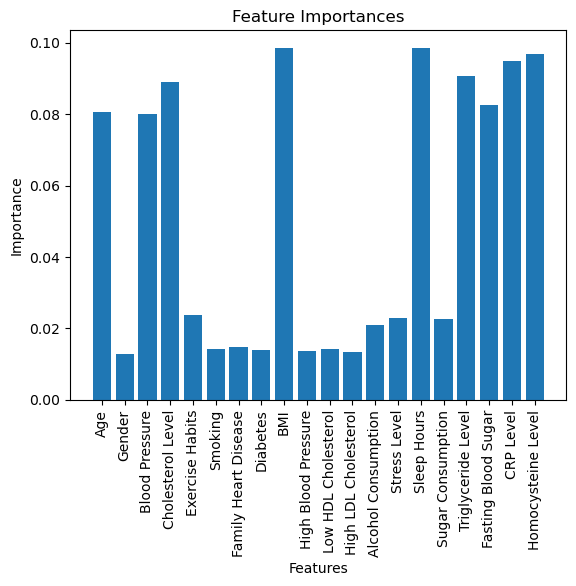

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
data = pd.read_csv("D:/heart_disease.csv")
print(data.columns)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

categorical_cols = ['Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 
                    'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 
                    'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 
                    'Fasting Blood Sugar']

encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

data['Heart Disease Status'] = encoder.fit_transform(data['Heart Disease Status'])

X = data.drop('Heart Disease Status', axis=1)  
y = data['Heart Disease Status'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')
feature_importances = rf.feature_importances_
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()